# CZ1016 : Assignment

## Essential Libraries

Let us begin by importing the essential Python Libraries.

     NumPy : Library for Numeric Computations in Python
     Pandas : Library for Data Acquisition and Preparation
     Matplotlib : Low-level library for Data Visualization
     Seaborn : Higher-level library for Data Visualization

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import string
string.punctuation

from collections import Counter

import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Setup : Import the Dataset

Dataset : "smsdata.txt" (use read_table function from Pandas to import)
After importing, take a quick look at the dataset using the head function.

In [2]:
smsData_df = pd.read_table('smsdata.txt', sep = "\t",header = None)
smsData_df.columns = ["label", "text"]
smsData_train = smsData_df[:4179]
smsData_test = smsData_df[-1393:]

In [3]:
smsData_train['length'] = smsData_train['text'].apply(len)
smsData_test['length'] = smsData_test['text'].apply(len)
spam_df = smsData_train[smsData_train['label'] == 'spam'] #create sub-dataframe of spam text
good_df = smsData_train[smsData_train['label'] == 'good'] #sub-dataframe of good text

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
smsData_train

,label,text,length
0,good,"Go until jurong point, crazy.. Available only ...",111
1,good,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,good,U dun say so early hor... U c already then say...,49
4,good,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
4174,good,Ok... But they said i've got wisdom teeth hidd...,77
4175,good,And pls pls drink plenty plenty water,37
4176,good,How are you doing. How's the queen. Are you go...,71
4177,good,He's in lag. That's just the sad part but we k...,74


# Solution : Classification

Use the labeled (good/spam) text messages in smsData to build a tree-based binary classifier that is capable of distinguishing spam text messages from the good ones. You may build a single decision tree or an ensemble (forest), whichever is better in this case. Try both, and find out which one is better.

Analyising the data I have chosen three predictors which I feel can best classsify if the text sent is a 'good' message or a 'spam' message

## Predictors 
     1. Frequency of occurance of the top 30 'spam' words occuring in the train dataset.
     2. Frequency of occurance of the top 30 'good' words occuring in the train dataset.
     3. Length of the text sent.

In [5]:
smsData_train.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
good   3614.0   71.512452  59.584108   2.0   33.0   52.0   93.0  910.0
spam    565.0  138.752212  29.139409  13.0  132.0  149.0  157.0  223.0

In [6]:
smsData_test.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
good   1211.0   71.267547  54.898880   2.0   34.0   52.0   93.0  446.0
spam    182.0  138.247253  28.035088  42.0  134.0  147.5  156.0  181.0

# Visualization 

## The subplots used :

    1.catplot
    2.boxplot
    3.Distplot
    4.Violinplot

## Other than these subplots the other graphs used were:

    1.Histogram
    2.wordcloud


## Catplot

good    3614
spam     565
Name: label, dtype: int64


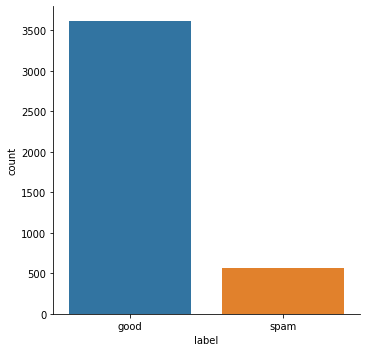

In [7]:
print(smsData_train["label"].value_counts())
sb.catplot(x = "label", data = smsData_train, kind = "count")

good    1211
spam     182
Name: label, dtype: int64


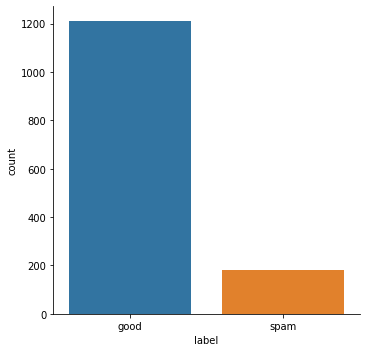

In [8]:
print(smsData_test["label"].value_counts())
sb.catplot(x = "label", data = smsData_test, kind = "count")

## Histogram

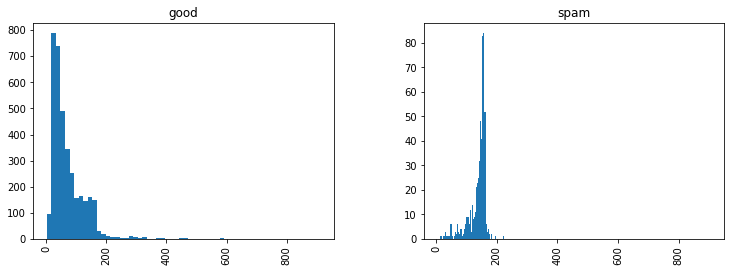

In [9]:
smsData_train.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

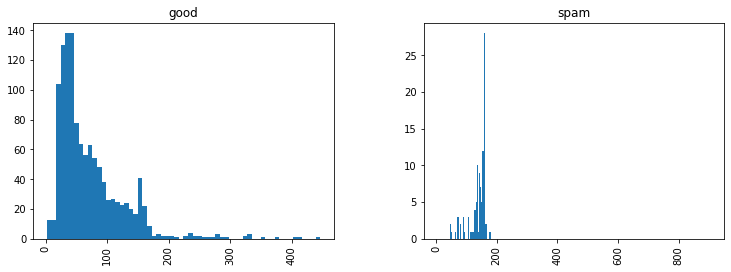

In [10]:
smsData_test.hist(column='length',by='label',bins=60,figsize=(12,4));
plt.xlim(-40,950);

# Wordclouds

Wordcloud give an idea about the most of common words used in a spam or good message.

In [11]:
def show_wordclouds(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

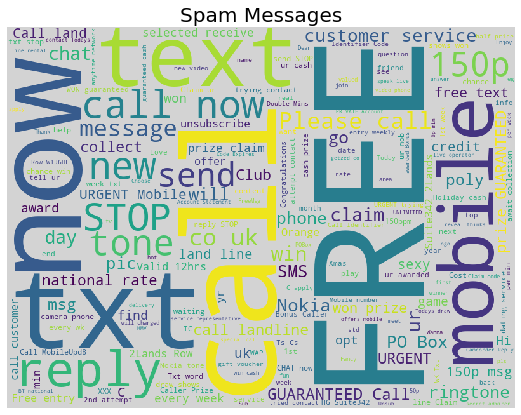

In [12]:
show_wordclouds(spam_df,"Spam Messages")

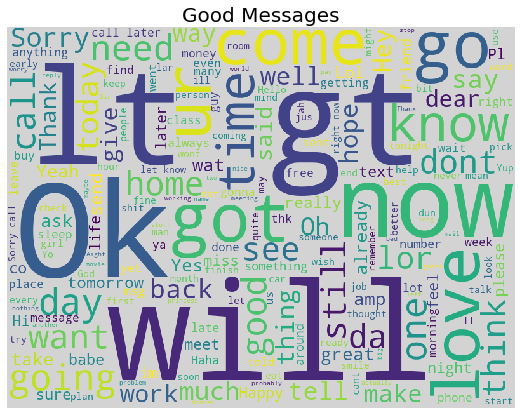

In [13]:

show_wordclouds(good_df,"Good Messages")

# Clean the Data

The data is processed by neglecting common words and punctuation marks in the texts using NLTK stopwords and punctuation is removed using the string module. Examples of common words like 'am','is','the',etc. are removed.
The text is converted into a list of worfs without the sepcified common words in the NLTK module and without punctuation marks.
Then, the top 30 'good' words and top 30 common 'spam' words are extracted and on comparing with the list of words of each statement the frequency of the 'good' words and 'spam' words are got which are included as two seperate predictors in the data frame.

In [14]:
# Function to remove common words using NLTK and punctuation marks using the string module.
def remove_stpwrds_punct(sms):
    
    remove_punctuation = [i for i in sms if i not in string.punctuation]
    remove_punctuation = "".join(remove_punctuation).split()
    
    remove_stopwords_and_punctuation = \
        [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words("english")]
        
    return remove_stopwords_and_punctuation

In [15]:
smsData1 = smsData_train['text'].apply(remove_stpwrds_punct).tolist()
smsData2 = smsData_test['text'].apply(remove_stpwrds_punct).tolist()

In [16]:
good_df.loc[:, 'text'] = good_df['text'].apply(remove_stpwrds_punct)
words_good_df = good_df['text'].tolist()

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
# get the list of 'good' words
list_good_words = []
for sublist in words_good_df:
    for item in sublist:
        list_good_words.append(item)

In [18]:
#extract the top 30 common 'good' words
c_good  = Counter(list_good_words)
good_words_df  = pd.DataFrame(c_good.most_common(30),  columns=['word', 'count'])

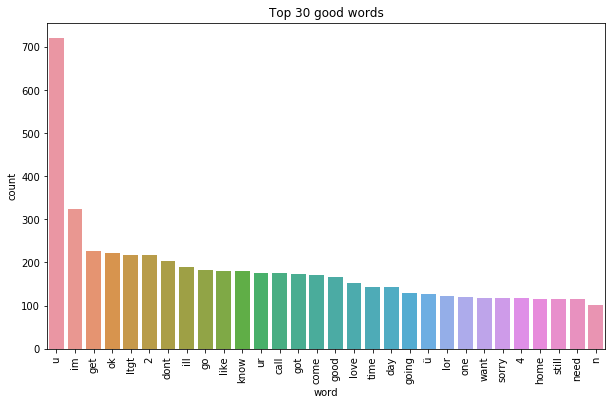

In [19]:
# barplot for the top 30 common 'good' words.
fig, ax = plt.subplots(figsize=(10, 6))
sb.barplot(x='word', y='count', 
            data=good_words_df, ax=ax)
plt.title("Top 30 good words")
plt.xticks(rotation='vertical');

In [20]:
spam_df.loc[0:, 'text'] = spam_df['text'].apply(remove_stpwrds_punct)
words_spam_df = spam_df['text'].tolist()

In [21]:
#get the list of 'spam' words
list_spam_words = []
for sublist in words_spam_df:
    for item in sublist:
        list_spam_words.append(item)

In [22]:
# top 30 common 'spam' words
c_spam  = Counter(list_spam_words)
spam_words_df  = pd.DataFrame(c_spam.most_common(30),  columns=['word', 'count'])

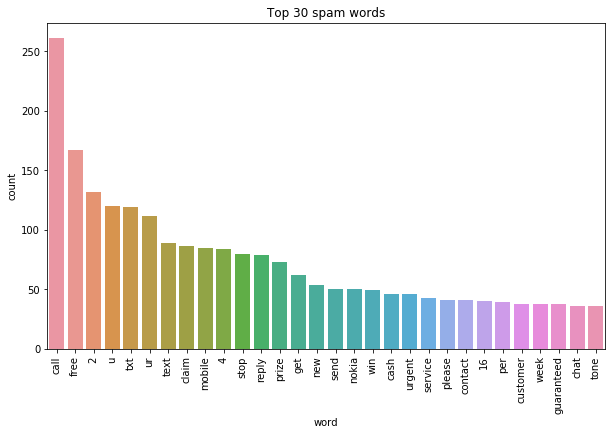

In [23]:
# barplot for the top 30 common spam words
fig, ax = plt.subplots(figsize=(10, 6))
sb.barplot(x='word', y='count', 
            data=spam_words_df, ax=ax)
plt.title("Top 30 spam words")
plt.xticks(rotation='vertical');

In [24]:
smsData_test

,label,text,length
4179,good,Two teams waiting for some players,34
4180,good,Can ü send me a copy of da report?,34
4181,good,"swhrt how u dey,hope ur ok, tot about u 2day.l...",67
4182,good,"Ok da, i already planned. I wil pick you.",41
4183,spam,Urgent! Please call 0906346330. Your ABTA comp...,143
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,good,Will ü b going to esplanade fr home?,36
5569,good,"Pity, * was in mood for that. So...any other s...",57
5570,good,The guy did some bitching but I acted like i'd...,125


In [25]:
# get the frequency of 'good' words in train dataset.
list_spam1 = []
i = 0
while i < 4179:
    sum =0
    j=0
    while j <= 29:
        k=0
        while k < len(smsData1[i]):
            if smsData1[i][k] == spam_words_df['word'][j]:
                sum = sum + 1
            k = k+1
        j = j+1
    i = i+1
    list_spam1.append(sum)

In [26]:
# get the frequency of 'good' words in test dataset.
list_spam2 = []
i = 0
while i < 1393:
    sum =0
    j=0
    while j <= 29:
        k=0
        while k < len(smsData2[i]):
            if smsData2[i][k] == spam_words_df['word'][j]:
                sum = sum + 1
            k = k+1
        j = j+1
    i = i+1
    list_spam2.append(sum)

In [27]:
# get the frequency of 'good' words in train dataset.
list_good1 = []
i = 0
while i < 4179:
    sum =0
    j=0
    while j <= 29:
        k=0
        while k < len(smsData1[i]):
            if smsData1[i][k] == good_words_df['word'][j]:
                sum = sum + 1
            k = k+1
        j = j+1
    i = i+1
    list_good1.append(sum)

In [28]:
# get the frequency of 'good' words in test dataset.
list_good2 = []
i = 0
while i < 1393:
    sum =0
    j=0
    while j <= 29:
        k=0
        while k < len(smsData2[i]):
            if smsData2[i][k] == good_words_df['word'][j]:
                sum = sum + 1
            k = k+1
        j = j+1
    i = i+1
    list_good2.append(sum)

In [29]:
# add the the frequency of 'good' words and 'spam' words occuring in the text as column
# in the train and test dataset.
smsData_train['freq_spam'] = list_spam1
smsData_train['freq_good'] = list_good1
smsData_test['freq_spam'] = list_spam2
smsData_test['freq_good'] = list_good2

/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/abhishek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on

In [30]:
smsData_train

,label,text,length,freq_spam,freq_good
0,good,"Go until jurong point, crazy.. Available only ...",111,0,3
1,good,Ok lar... Joking wif u oni...,29,1,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,5,1
3,good,U dun say so early hor... U c already then say...,49,2,2
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,1
...,...,...,...,...,...
4174,good,Ok... But they said i've got wisdom teeth hidd...,77,1,5
4175,good,And pls pls drink plenty plenty water,37,0,0
4176,good,How are you doing. How's the queen. Are you go...,71,0,1
4177,good,He's in lag. That's just the sad part but we k...,74,0,0


In [31]:
smsData_test

,label,text,length,freq_spam,freq_good
4179,good,Two teams waiting for some players,34,0,0
4180,good,Can ü send me a copy of da report?,34,1,1
4181,good,"swhrt how u dey,hope ur ok, tot about u 2day.l...",67,3,5
4182,good,"Ok da, i already planned. I wil pick you.",41,0,1
4183,spam,Urgent! Please call 0906346330. Your ABTA comp...,143,5,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,9,6
5568,good,Will ü b going to esplanade fr home?,36,0,3
5569,good,"Pity, * was in mood for that. So...any other s...",57,0,0
5570,good,The guy did some bitching but I acted like i'd...,125,2,1


In [32]:
freq_spam1 = pd.DataFrame(smsData_train['freq_spam'])  
freq_good1 = pd.DataFrame(smsData_train['freq_good'])
length1 = pd.DataFrame(smsData_train['length']) 
label1 = pd.DataFrame(smsData_train['label'])
freq_spam2 = pd.DataFrame(smsData_test['freq_spam'])  
freq_good2 = pd.DataFrame(smsData_test['freq_good'])
length2 = pd.DataFrame(smsData_test['length']) 
label2 = pd.DataFrame(smsData_test['label'])

In [33]:
# split the predictors into train and test dataset.
freq_spam_train = pd.DataFrame(freq_spam1)
freq_good_train = pd.DataFrame(freq_good1)
length_train = pd.DataFrame(length1)
label_train = pd.DataFrame(label1)
freq_spam_test = pd.DataFrame(freq_spam2)
freq_good_test = pd.DataFrame(freq_good2)
length_test = pd.DataFrame(length2)
label_test = pd.DataFrame(label2)

## Countplot

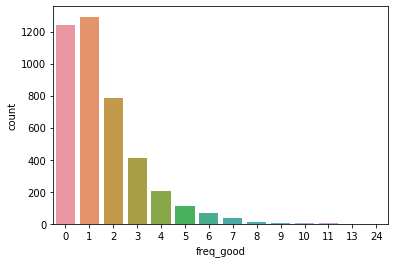

In [34]:
sb.countplot(freq_good_train["freq_good"])

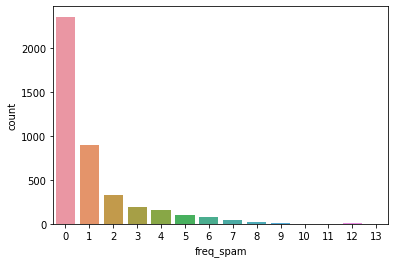

In [35]:
sb.countplot(freq_spam_train["freq_spam"])

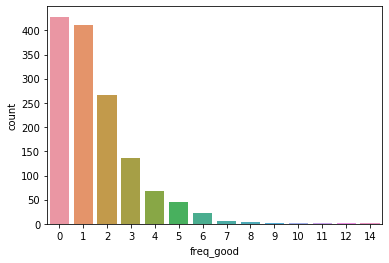

In [36]:
sb.countplot(freq_good_test["freq_good"])

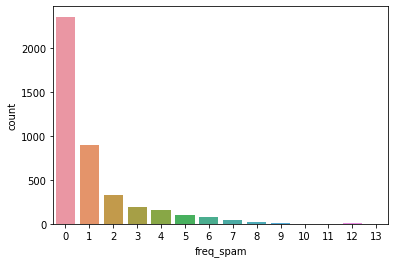

In [37]:
sb.countplot(freq_spam_train["freq_spam"])

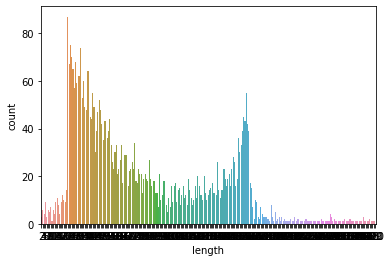

In [38]:
sb.countplot(length_train["length"])

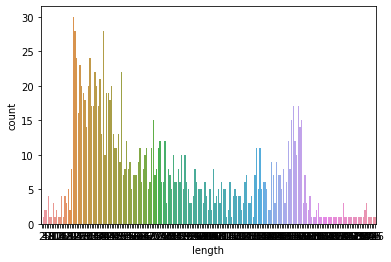

In [39]:
sb.countplot(length_test["length"])

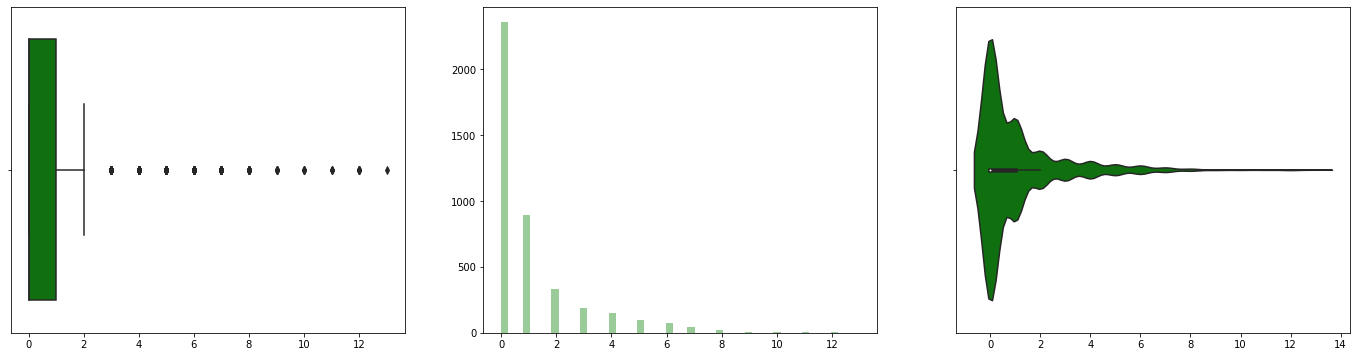

In [40]:
# subplots for predictor freq_spam_train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(freq_spam_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(freq_spam_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(freq_spam_train, ax = axes[2], color = "g")

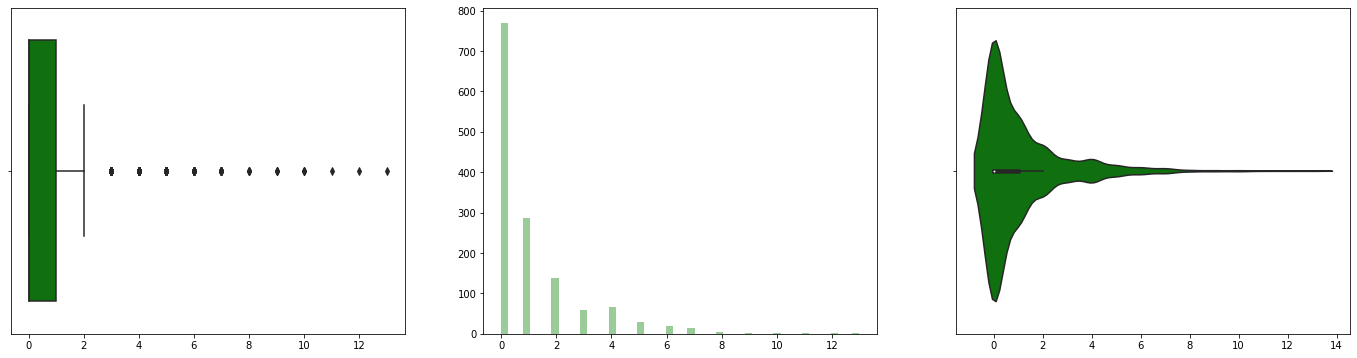

In [41]:
# subplots for predictor freq_spam_test
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(freq_spam_test, orient = "h", ax = axes[0], color = "g")
sb.distplot(freq_spam_test, kde = False, ax = axes[1], color = "g")
sb.violinplot(freq_spam_test, ax = axes[2], color = "g")

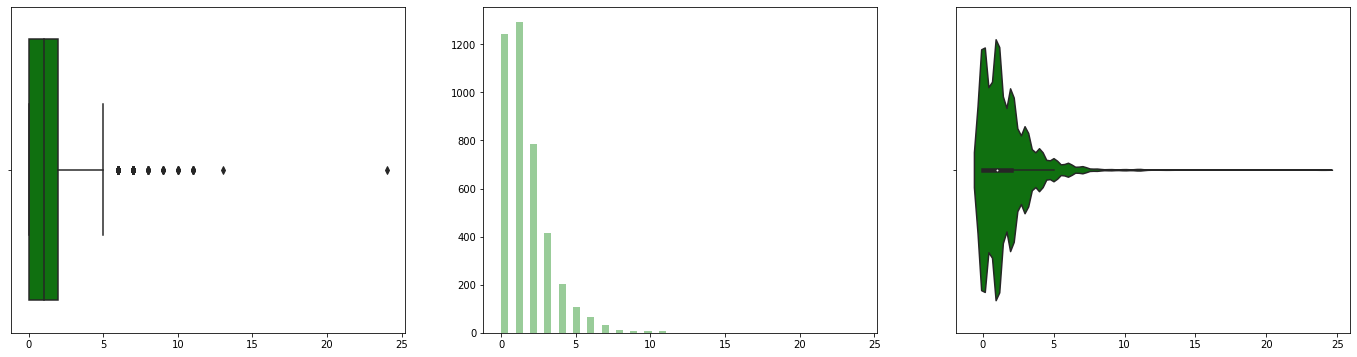

In [42]:
# subplots for predictor freq_good_train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(freq_good_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(freq_good_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(freq_good_train, ax = axes[2], color = "g")

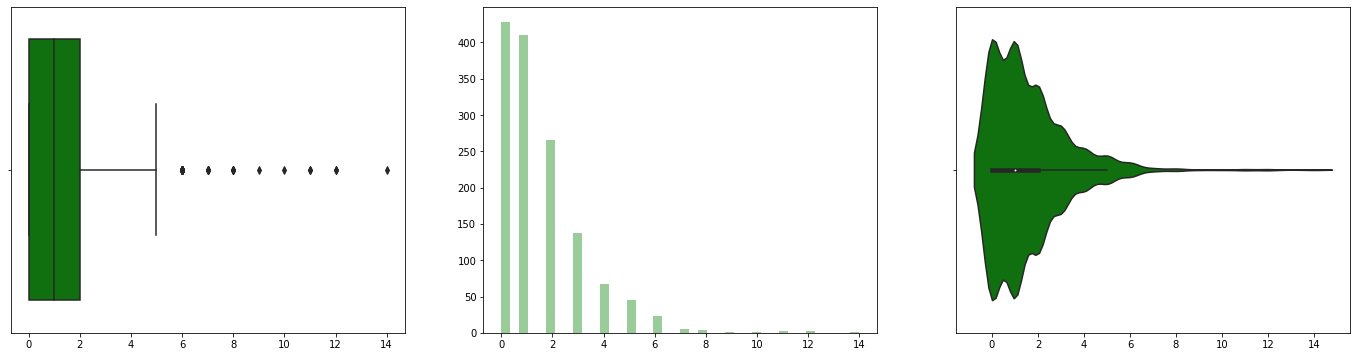

In [43]:
# subplots for predictor freq_good_test
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(freq_good_test, orient = "h", ax = axes[0], color = "g")
sb.distplot(freq_good_test, kde = False, ax = axes[1], color = "g")
sb.violinplot(freq_good_test, ax = axes[2], color = "g")

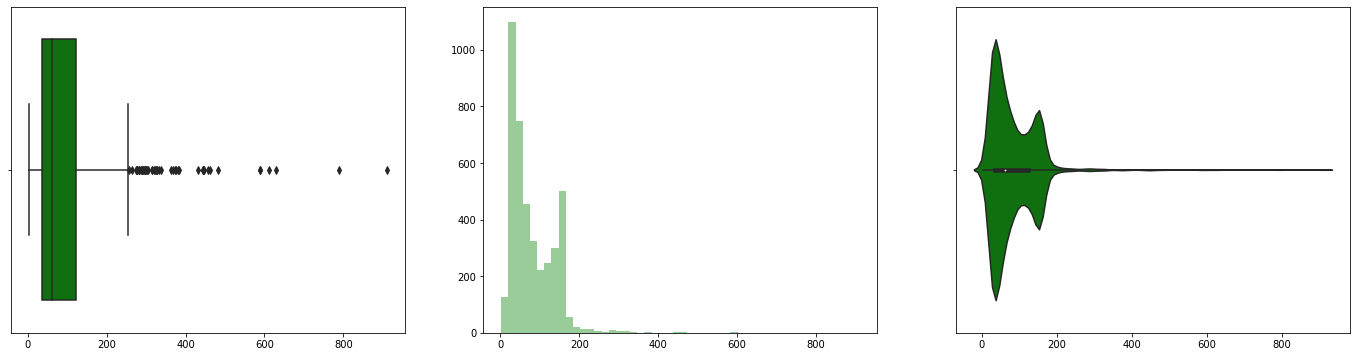

In [44]:
# subplots for predictor length_train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(length_train, orient = "h", ax = axes[0], color = "g")
sb.distplot(length_train, kde = False, ax = axes[1], color = "g")
sb.violinplot(length_train, ax = axes[2], color = "g")

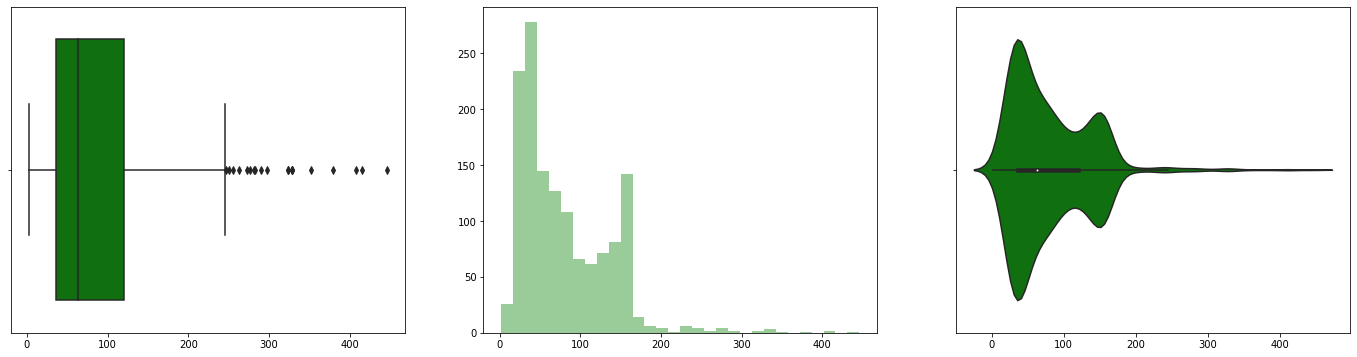

In [45]:
# subplots for predictor length_test
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(length_test, orient = "h", ax = axes[0], color = "g")
sb.distplot(length_test, kde = False, ax = axes[1], color = "g")
sb.violinplot(length_test, ax = axes[2], color = "g")

## Boxplot

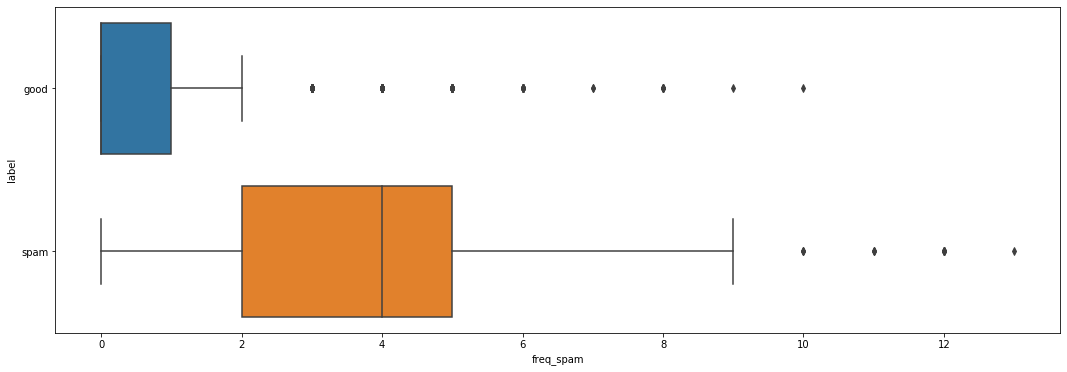

In [46]:
jointDF = pd.concat([freq_spam_train, label_train.reindex(index=freq_spam_train.index)], sort = False, axis = 1)

# Joint Boxplot of freq_spam Train against label Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "freq_spam", y = "label", data = jointDF, orient = "h")

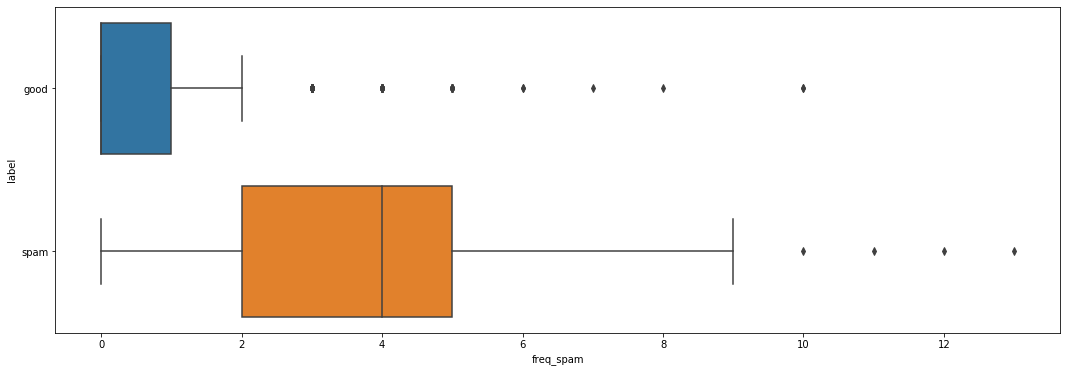

In [47]:
jointDF = pd.concat([freq_spam_test, label_test.reindex(index=freq_spam_test.index)], sort = False, axis = 1)

# Joint Boxplot of freq_soam Test against label test
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "freq_spam", y = "label", data = jointDF, orient = "h")

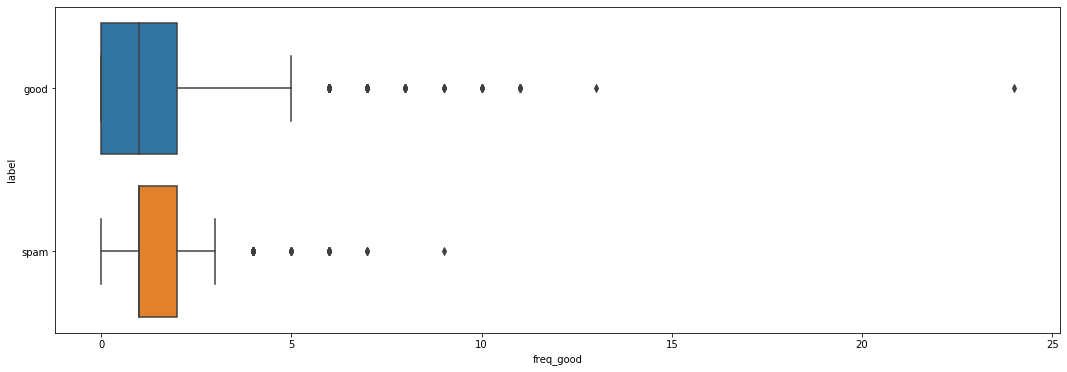

In [48]:
jointDF = pd.concat([freq_good_train, label_train.reindex(index=freq_spam_train.index)], sort = False, axis = 1)

# Joint Boxplot of freq_good Train against label Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "freq_good", y = "label", data = jointDF, orient = "h")

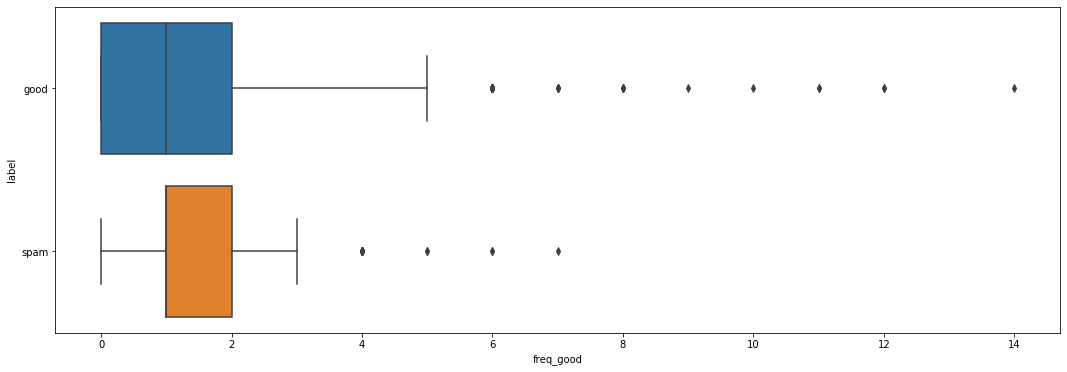

In [49]:
jointDF = pd.concat([freq_good_test, label_test.reindex(index=freq_spam_test.index)], sort = False, axis = 1)

# Joint Boxplot of freq_good Test against label Test
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "freq_good", y = "label", data = jointDF, orient = "h")

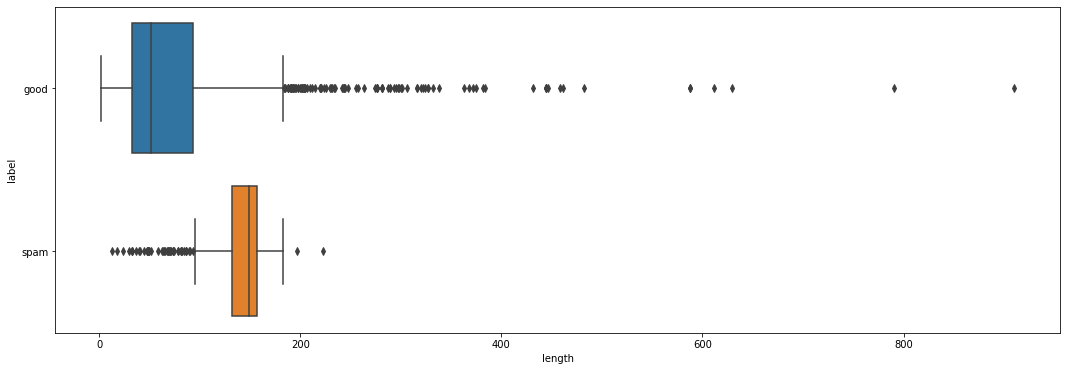

In [50]:
jointDF = pd.concat([length_train, label_train.reindex(index=length_train.index)], sort = False, axis = 1)

# Joint Boxplot of length Train against label Train
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "length", y = "label", data = jointDF, orient = "h")

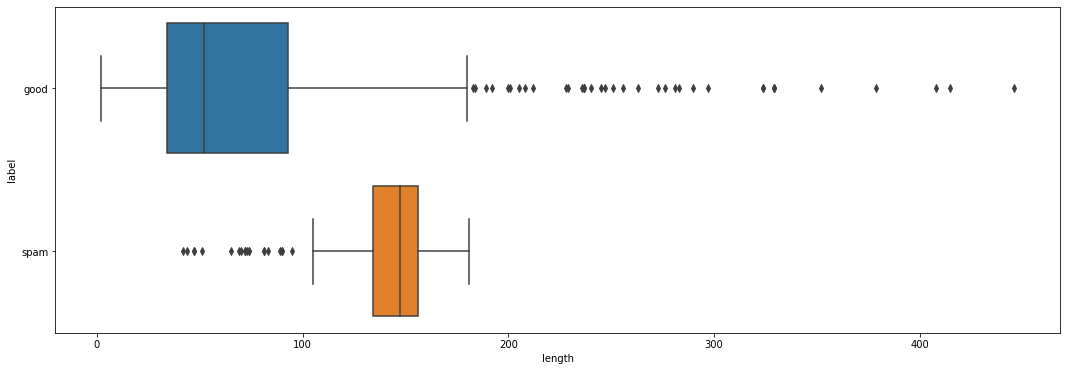

In [51]:
jointDF = pd.concat([length_test, label_test.reindex(index=length_test.index)], sort = False, axis = 1)

# Joint Boxplot of length Test against label Test
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "length", y = "label", data = jointDF, orient = "h")

In [52]:
smsData_train.head()

,label,text,length,freq_spam,freq_good
0,good,"Go until jurong point, crazy.. Available only ...",111,0,3
1,good,Ok lar... Joking wif u oni...,29,1,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,5,1
3,good,U dun say so early hor... U c already then say...,49,2,2
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,1


In [53]:
smsData_test.head()

,label,text,length,freq_spam,freq_good
4179,good,Two teams waiting for some players,34,0,0
4180,good,Can ü send me a copy of da report?,34,1,1
4181,good,"swhrt how u dey,hope ur ok, tot about u 2day.l...",67,3,5
4182,good,"Ok da, i already planned. I wil pick you.",41,0,1
4183,spam,Urgent! Please call 0906346330. Your ABTA comp...,143,5,2


In [54]:
#split the data into test and train
y_train = pd.DataFrame(smsData_train["label"])
X_train = pd.DataFrame(smsData_train[["length", "freq_spam", "freq_good"]])
y_test = pd.DataFrame(smsData_test["label"])
X_test = pd.DataFrame(smsData_test[["length", "freq_spam", "freq_good"]])

In [55]:
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4179, 1) (4179, 3)
Test Set  : (1393, 1) (1393, 3)


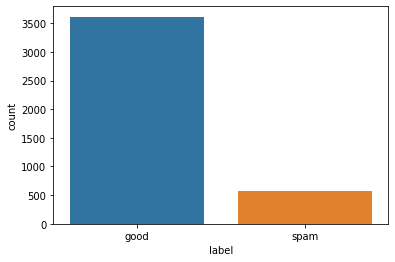

In [56]:
sb.countplot(y_train["label"])

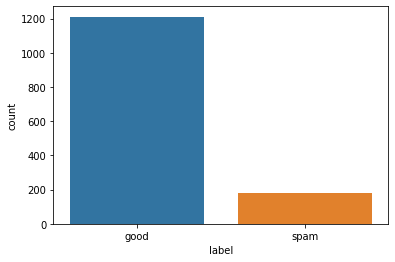

In [57]:
sb.countplot(y_test["label"])

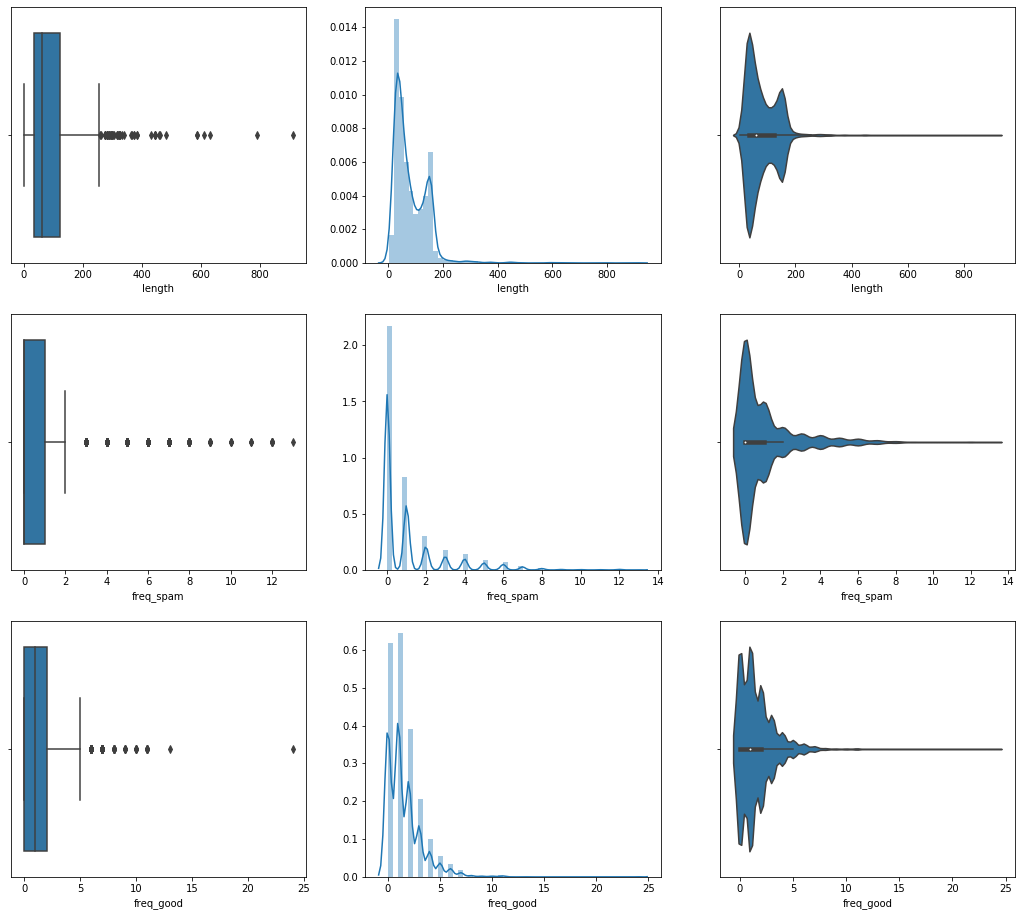

In [58]:
# Draw the distributions of all Predictors train data
f, axes = plt.subplots(3, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

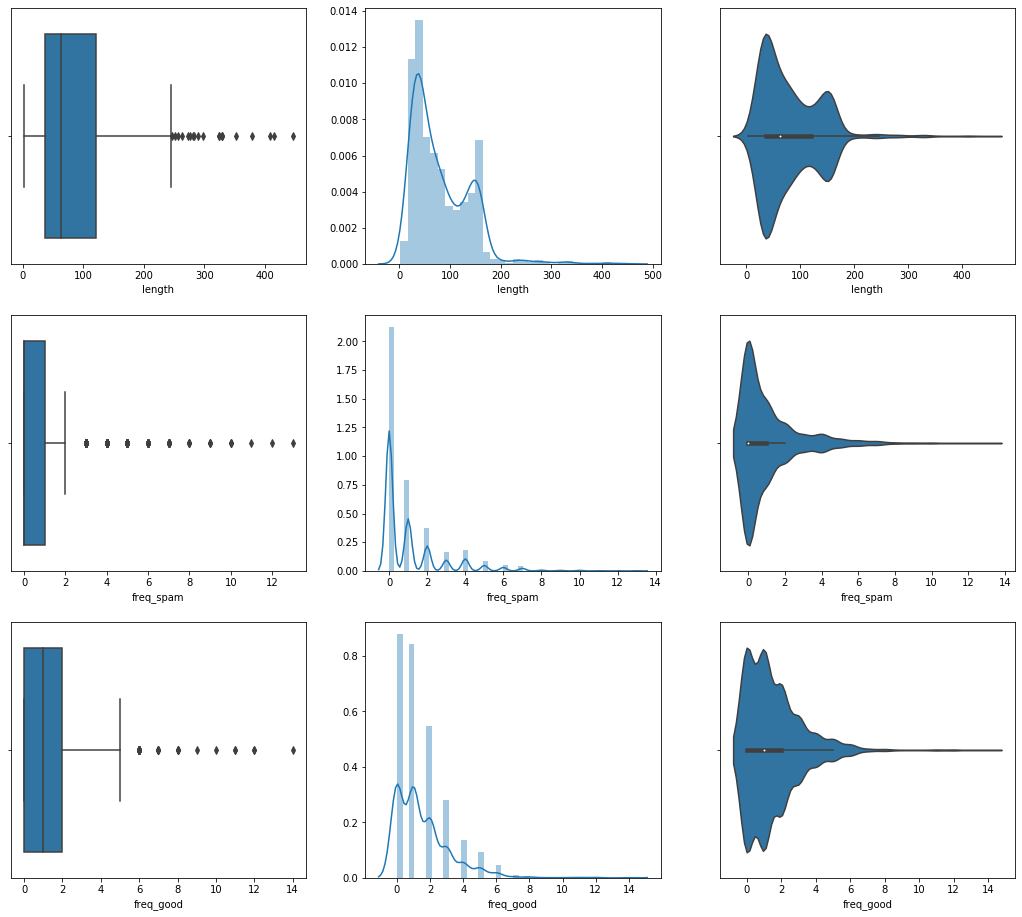

In [59]:
# Draw the distributions of all Predictors test data 
f, axes = plt.subplots(3, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_test[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_test[var], ax = axes[count,1])
    sb.violinplot(X_test[var], ax = axes[count,2])
    count += 1

# Single Variable Decision Tree

This has been done in order to understand how well each predictor can effectively classify the text into 'spam' or a 'good' message.

Decision tree has been selected to have a maximum depth of three.

In [60]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

In [61]:
# Train the Decision Tree Classifier model
dectree.fit(freq_spam_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

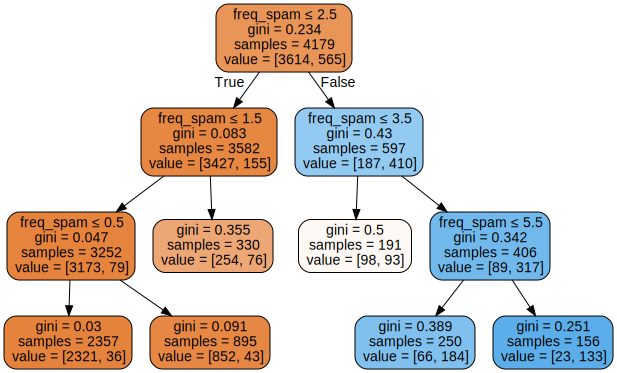

In [62]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = freq_spam_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.9193586982531706
True Positive Rate:   0.5610619469026549
True Negative Rate:   0.9753735473159934
False Positive Rate:  0.02462645268400664
False Negative Rate:  0.4389380530973451


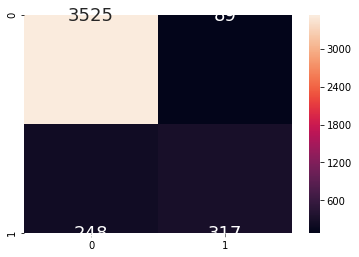

In [63]:
# Predict Legendary corresponding to freq_spam_train
label_train_pred = dectree.predict(freq_spam_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(freq_spam_train, label_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_train, label_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_train, label_train_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

Classification Accuracy 	: 0.9109834888729361
True Positive Rate:   0.5494505494505495
True Negative Rate:   0.9653179190751445
False Positive Rate:  0.03468208092485549
False Negative Rate:  0.45054945054945056


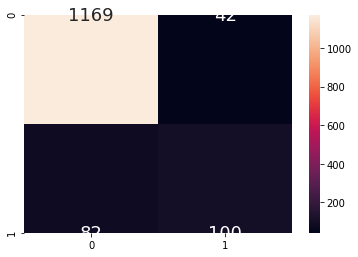

In [64]:
# Predict Legendary corresponding to freq_spam_test
label_test_pred = dectree.predict(freq_spam_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(freq_spam_test, label_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_test, label_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_test, label_test_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

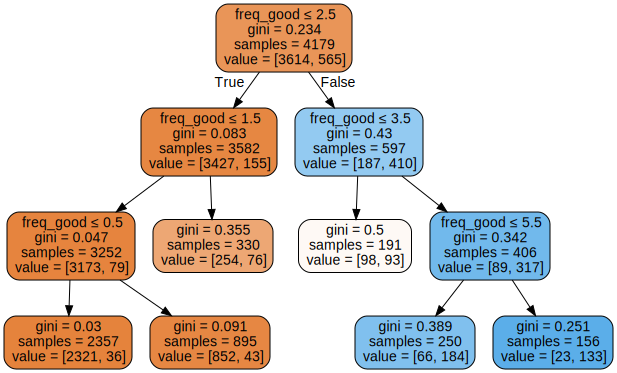

In [65]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = freq_good_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.789901890404403
True Positive Rate:   0.1168141592920354
True Negative Rate:   0.8951300498063088
False Positive Rate:  0.1048699501936912
False Negative Rate:  0.8831858407079646


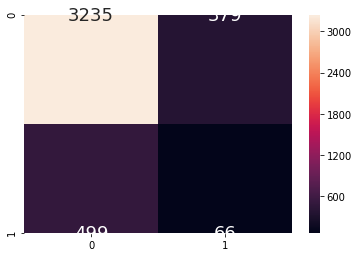

In [66]:
# Predict Legendary corresponding to freq_good_train
label_train_pred = dectree.predict(freq_good_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(freq_good_train, label_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_train, label_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_train, label_train_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

Classification Accuracy 	: 0.9109834888729361
True Positive Rate:   0.5494505494505495
True Negative Rate:   0.9653179190751445
False Positive Rate:  0.03468208092485549
False Negative Rate:  0.45054945054945056


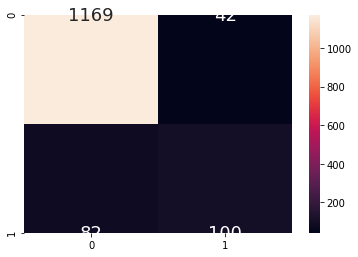

In [67]:
# Predict Legendary corresponding to freq_spam_test
label_test_pred = dectree.predict(freq_spam_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(freq_spam_test, label_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_test, label_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_test, label_test_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

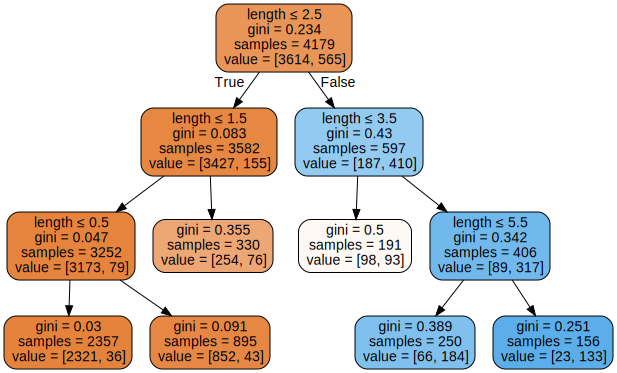

In [68]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = length_train.columns,      # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

Classification Accuracy 	: 0.1373534338358459
True Positive Rate:   1.0
True Negative Rate:   0.0024903154399557276
False Positive Rate:  0.9975096845600443
False Negative Rate:  0.0


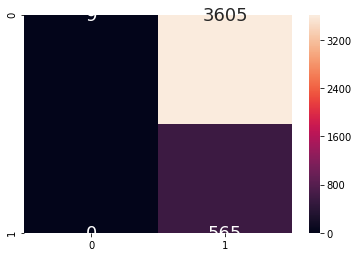

In [69]:
# Predict Legendary corresponding to length_train
label_train_pred = dectree.predict(length_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(length_train, label_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_train, label_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_train, label_train_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

Classification Accuracy 	: 0.13280689160086145
True Positive Rate:   1.0
True Negative Rate:   0.002477291494632535
False Positive Rate:  0.9975227085053675
False Negative Rate:  0.0


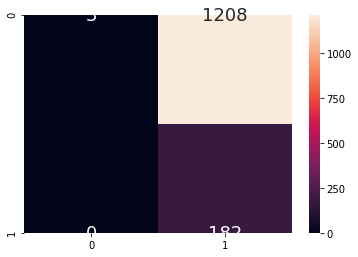

In [70]:
# Predict Legendary corresponding to length_test
label_test_pred = dectree.predict(length_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(length_test, label_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(label_test, label_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[[tn, fp], [fn, tp]] = confusion_matrix(y_test, label_test_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))

In [71]:
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4179, 1) (4179, 3)
Test Set  : (1393, 1) (1393, 3)


# Multi-Variate Classification Tree

The decision tree used has a max depth of 5 

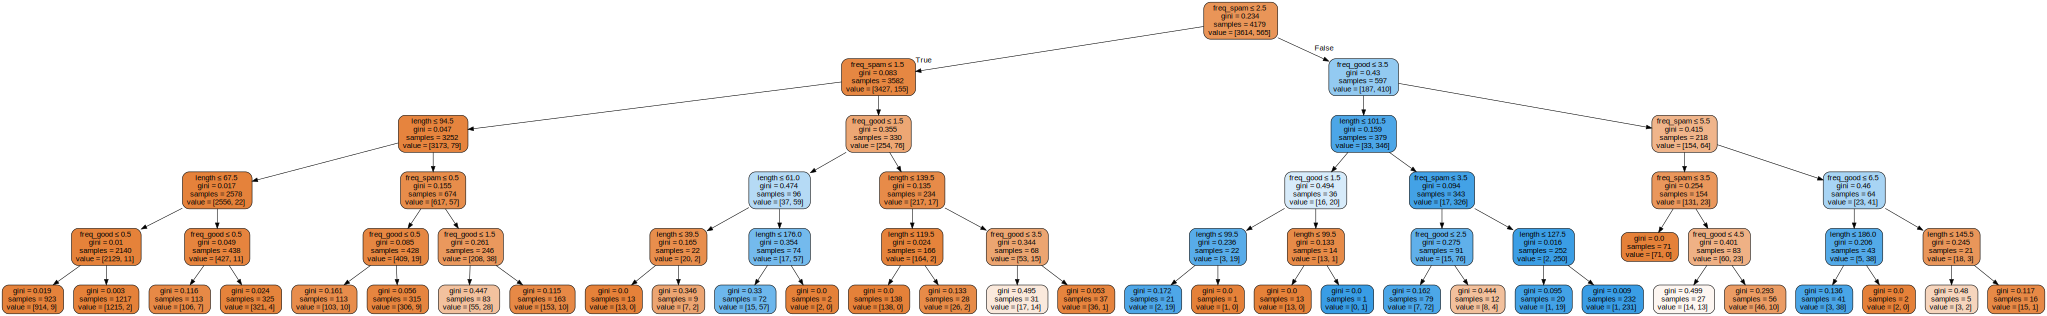

In [72]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9624312036372338

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9504666188083274

True Positive Rate:   0.7734513274336283
True Negative Rate:   0.9919756502490316
False Positive Rate:  0.008024349750968456
False Negative Rate:  0.22654867256637168

True Positive Rate:   0.7362637362637363
True Negative Rate:   0.9826589595375722
False Positive Rate:  0.017341040462427744
False Negative Rate:  0.26373626373626374

precision:  0.7362637362637363
recall:  0.864516129032258

the f1_score for the classification model:  0.7952522255192879


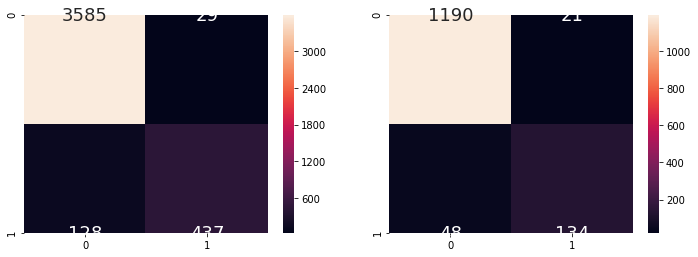

In [87]:
# Predict Legendary values corresponding to predictors (length, freq_spam, freq_good)
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
[[tn, fp], [fn, tp]] = confusion_matrix(y_train, y_train_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))
print("")

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
[[tn, fp], [fn, tp]] = confusion_matrix(y_test, y_test_pred)
print("True Positive Rate:  ", tp/(tp+fn))
print("True Negative Rate:  ", tn/(tn+fp))
print("False Positive Rate: ", fp/(tn+fp))
print("False Negative Rate: ", fn/(tp+fn))
print("")

precision = tp/(tp+fn)
recall = tp/(tp+fp)

print("precision: ",precision)
print("recall: ",recall)
print("")

f1_score = (2*precision*recall)/(precision+recall)

print("the f1_score for the classification model: ",f1_score)

# Random Forest

The maximum depth that has been used here is 5 

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 5)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9633883704235463

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9519023689877961

Train Dataset
True Positive Rate:   0.7911504424778761
True Negative Rate:   0.9903154399557277
False Positive Rate:  0.009684560044272275
False Negative Rate:  0.2088495575221239

Test Dataset
True Positive Rate:   0.7527472527472527
True Negative Rate:   0.9818331957060281
False Positive Rate:  0.018166804293971925
False Negative Rate:  0.24725274725274726

precision:  0.7527472527472527
recall:  0.8616352201257862

the f1_score for the classification model:  0.8035190615835777


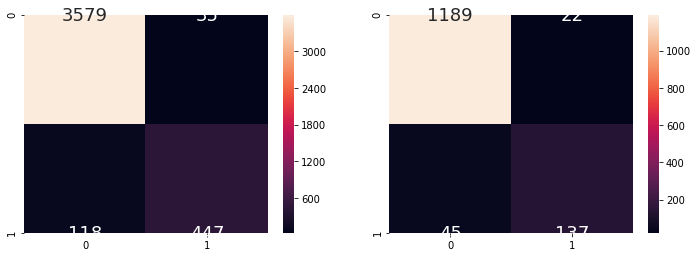

In [88]:
from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to predictors (length, freq_spam, freq_good)
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
[[tn1, fp1], [fn1, tp1]] = confusion_matrix(y_train, y_train_pred)
print("Train Dataset")
print("True Positive Rate:  ", tp1/(tp1+fn1))
print("True Negative Rate:  ", tn1/(tn1+fp1))
print("False Positive Rate: ", fp1/(tn1+fp1))
print("False Negative Rate: ", fn1/(tp1+fn1))
print("")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
[[tn2, fp2], [fn2, tp2]] = confusion_matrix(y_test, y_test_pred)
print("Test Dataset")
print("True Positive Rate:  ", tp2/(tp2+fn2))
print("True Negative Rate:  ", tn2/(tn2+fp2))
print("False Positive Rate: ", fp2/(tn2+fp2))
print("False Negative Rate: ", fn2/(tp2+fn2))
print("")

precision = tp2/(tp2+fn2)
recall = tp2/(tp2+fp2)

print("precision: ",precision)
print("recall: ",recall)
print("")

f1_score = (2*precision*recall)/(precision+recall)

print("the f1_score for the classification model: ",f1_score)

In [80]:
# Extract Pokemons for Prediction
smsData_train_pred = smsData_train[smsData_train["label"].isin(["spam","good"])]
smsData_train_pred

,label,text,length,freq_spam,freq_good
0,good,"Go until jurong point, crazy.. Available only ...",111,0,3
1,good,Ok lar... Joking wif u oni...,29,1,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,5,1
3,good,U dun say so early hor... U c already then say...,49,2,2
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,1
...,...,...,...,...,...
4174,good,Ok... But they said i've got wisdom teeth hidd...,77,1,5
4175,good,And pls pls drink plenty plenty water,37,0,0
4176,good,How are you doing. How's the queen. Are you go...,71,0,1
4177,good,He's in lag. That's just the sad part but we k...,74,0,0


In [81]:
# Extract Pokemons for Prediction
smsData_test_pred = smsData_test[smsData_test["label"].isin(["spam","good"])]
smsData_test_pred

,label,text,length,freq_spam,freq_good
4179,good,Two teams waiting for some players,34,0,0
4180,good,Can ü send me a copy of da report?,34,1,1
4181,good,"swhrt how u dey,hope ur ok, tot about u 2day.l...",67,3,5
4182,good,"Ok da, i already planned. I wil pick you.",41,0,1
4183,spam,Urgent! Please call 0906346330. Your ABTA comp...,143,5,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,9,6
5568,good,Will ü b going to esplanade fr home?,36,0,3
5569,good,"Pity, * was in mood for that. So...any other s...",57,0,0
5570,good,The guy did some bitching but I acted like i'd...,125,2,1


In [82]:
# Extract Predictors for Prediction
X_pred_train = pd.DataFrame(smsData_train_pred[["length", "freq_spam", "freq_good"]])

# Predict Response corresponding to Predictors
y_pred_train = rforest.predict(X_pred_train)
y_pred_train

array(['good', 'good', 'spam', ..., 'good', 'good', 'good'], dtype=object)

In [83]:
# Extract Predictors for Prediction
X_pred_test = pd.DataFrame(smsData_test_pred[["length", "freq_spam", "freq_good"]])

# Predict Response corresponding to Predictors
y_pred_test = rforest.predict(X_pred_test)
y_pred_test

array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype=object)

In [84]:
y_prob_train = rforest.predict_proba(X_pred_train)
np.set_printoptions(precision = 3)
print(y_prob_train)

[[0.983 0.017]
 [0.992 0.008]
 [0.092 0.908]
 ...
 [0.98  0.02 ]
 [0.963 0.037]
 [0.993 0.007]]


In [85]:
y_prob_test = rforest.predict_proba(X_pred_test)
np.set_printoptions(precision = 3)
print(y_prob_test)

[[0.988 0.012]
 [0.984 0.016]
 [0.931 0.069]
 ...
 [0.988 0.012]
 [0.555 0.445]
 [0.988 0.012]]


# Conclusion

After analysing the data the chosen predictors were length of the text sent, the frequency of occurence of the 30 most commonly occuring 'good' words from the train dataset and the frequency of occurence of the 30 most commonly occuring 'bad' words from the train dataset

Single variable decsion tree has been used to analyise how well the predictors can predict if the text is 'good' or 'bad'. After analyising, length can be said to have the worst accuracy for prediction and using  frequency of spam words as a predictor can be said to have the best accuracuy in precicting if the text is a good message or spam message. 

I have built a classification algorithm that is, a multivariable classification tree and random forest.
Multi variable decision tree using frequency of spam words, frequency of good words and length as predictors gives an accuracy of about 95.04% on the test data in predicting if the text is good or bad while Random forest, using frequency of spam words, frequency of good words and length as predictors, gives an accuracy of 95.62% on the test data in predicting if the text is good or bad. So, between Decsion tree and Random Forest , random forest is better since it has greater classification accuracy. 

Cosnidering the fact that the random forest has a classification accuracy of 95.62% on the test dataset which is fairly accurate.

## Refrences

1. https://towardsdatascience.com/spam-or-ham-introduction-to-natural-language-processing-part-2-a0093185aebd
2. https://www.kaggle.com/dejavu23/sms-spam-or-ham-beginner